In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [14]:
def dice_simulation(num):
    import random
    %matplotlib inline
    dice_list = []
    rolls = {}

    for k in range(2, 13):
        rolls[k] = 0
        doubles = 0
        
    for k in range(num):
        first = random.randint(1, 6)
        second = random.randint(1, 6)
        if first == second:
            doubles+=1
        rolls[first+second]+=1
        
    for k in rolls:
        #print('%d - %d %f%%' %(k, rolls[k], float(rolls[k])/float(num)*100))
        dice_list.append((k, rolls[k], float(rolls[k])/float(num)*100))
            
    #print('Doubles - %d - %f%%' %(doubles, float(doubles)/float(num)))
    df_dice = pd.DataFrame.from_records(dice_list)
    #df_dice.plot(kind='bar', x=0, y=1)
    df_dice.plot(kind='bar', x=0, y=2)

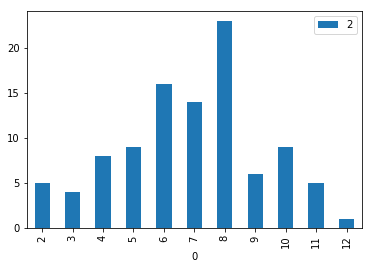

In [15]:
dice_simulation(100)


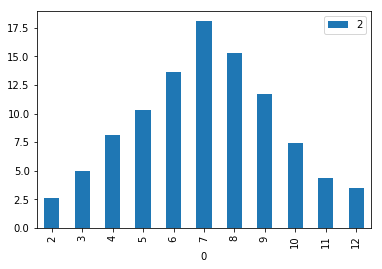

In [16]:
dice_simulation(1000)

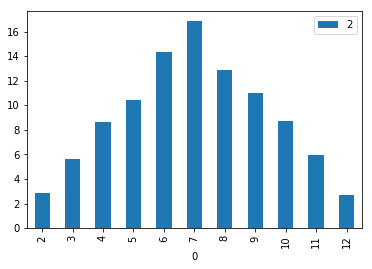

In [17]:
dice_simulation(10000)

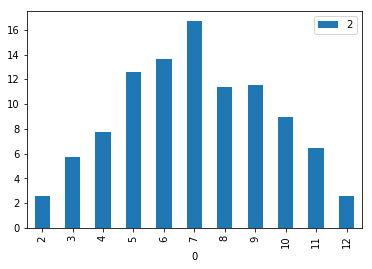

In [18]:
dice_simulation(850)

In [48]:
def dice_simulation2(rolls, num):
    import random
    %matplotlib inline
    
    ctr = 0
    dice_list=[]
    for x in range(1, rolls+1):
        outcome = random.randint(1,6) + random.randint(1,6)
        if outcome == num:
            ctr += 1
        dice_list.append((x, max((ctr/x,0))*100))
        
    df_dice = pd.DataFrame.from_records(dice_list)
        
    return df_dice

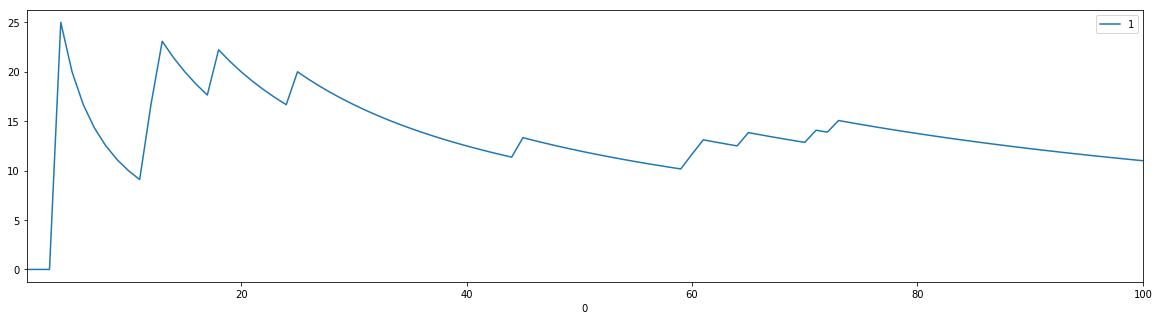

In [49]:
dice_simulation2(100,7).plot(kind='line', x=0, y=1, figsize=(20,5))

### 1000 rolls for 7

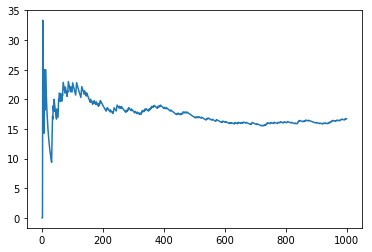

In [69]:
sim1 = dice_simulation2(1000,7)
actual=[]
for i in range(10001):
    actual.append((1,16.6))
act1 = pd.DataFrame.from_records(actual)
plt.plot(sim1.loc[:,0], sim1.loc[:,1], act1.loc[:,0], act1.loc[:,1])

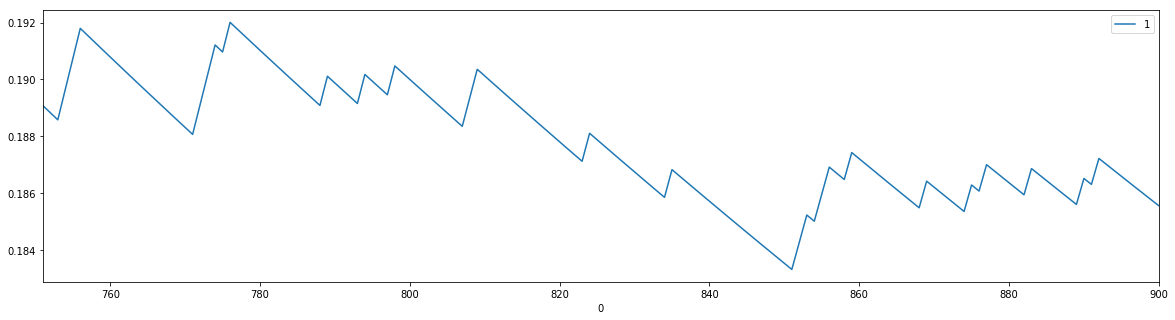

In [22]:
sim1[750:900].plot(kind='line', x=0, y=1, figsize=(20,5))

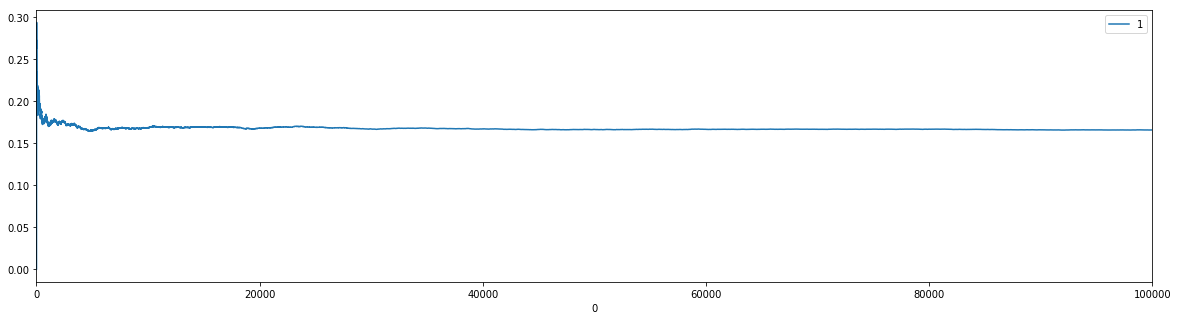

In [23]:
sim2 = dice_simulation2(100000,7)
sim2.plot(kind='line', x=0, y=1, figsize=(20,5))

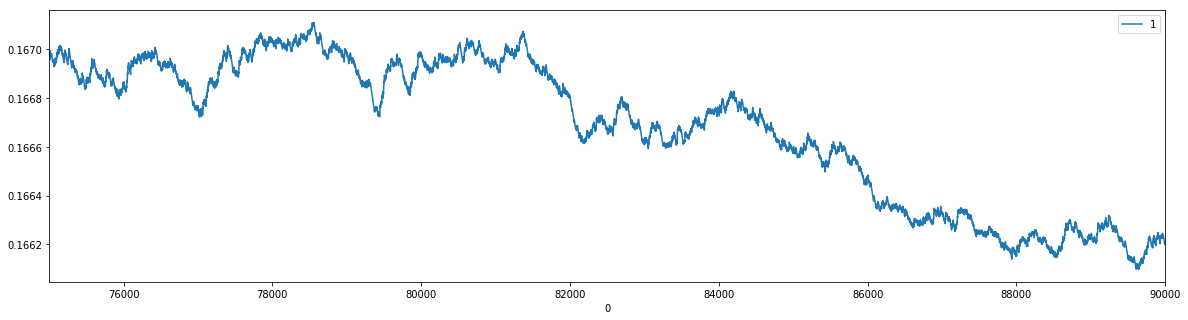

In [24]:
sim2[75000:90000].plot(kind='line', x=0, y=1, figsize=(20,5))

In [ ]:
sim2[75000:90000].plot(kind='line', x=0, y=1, figsize=(20,5))

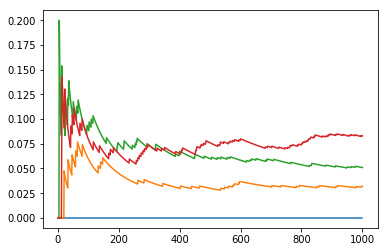

In [46]:
sim = []
for i in range(13):
    sim.append(dice_simulation2(1000,i))

plt.plot(sim[1].loc[:,0], sim[1].loc[:,1], sim[2].loc[:,0], sim[2].loc[:,1],sim[3].loc[:,0], sim[3].loc[:,1],sim[4].loc[:,0], sim[4].loc[:,1],label="1")
#plt.plot(sim[4].loc[:,0], sim[4].loc[:,1],label="4")
plt.show()



In [34]:
import math

def birthday_problem(people):
    numerator = math.factorial(365)
    denominator = math.factorial(365-people) * pow(365,people)
    no_same_birthday = (numerator / denominator) * 100
    same_birthday = 100 - no_same_birthday

    #print("numerator: {}".format(numerator))
    #print("denominator: {}".format(denominator))
    print("no_same_birthday: {}".format(no_same_birthday))
    print("same_birthday: {}".format(same_birthday))
    

In [76]:
birthday_problem(25)

no_same_birthday: 43.13002960305361
same_birthday: 56.86997039694639


In [36]:
birthday_problem(30)

no_same_birthday: 29.368375728073133
same_birthday: 70.63162427192687


In [70]:
birthday_problem(153)

no_same_birthday: 4.940102491991265e-15
same_birthday: 100.0


In [71]:
birthday_problem(100)

no_same_birthday: 3.072489278515774e-05
same_birthday: 99.99996927510722


In [74]:
def bday_problem(n, days):
    prob = 1
    for i in range(n): 
        prob *= (days - i)/days #calculate probability of no one having the same birthday
    return (1-prob) #the complement of the prob above

In [75]:
bday_problem(24,365)

0.538344257914529

In [ ]:
(p->((q^r)v(~q^~r))^(q->(p^r)v(r->(~p))))

In [ ]:
(p->((q^r)v(~q^~r))^(q->(p^r)v(WELL-FORMED))))

### Propositional Logic
P0 - atomic
P1 - grouping
P2 - negation
P3 - conjunction
P4 - disjunction
P5 - implication
P6 - conclusion

#### Reference
https://en.wikipedia.org/wiki/Logical_connective

#### Exercise
(p->((q^r)v(~q^~r))^(q->(p^r)v**(r->(~p))**))
 1. r,p,q by P0
 2. ~p, ~q, ~r by 1,P2
 3. (~p) by 2,P1
 4. r->(~p) by 1,3,P5
 5. (r->(~p)) by 4,P1

(p->((q^r)v(~q^~r))^(q->**(p^r)**v(r->(~p))))
 6. p^r by P3
 7. (p^r) by 6, P1

(p->((q^r)v(~q^~r))^(q->**(p^r)v(r->(~p))**))
 8. (p^r)v(r->(~p)) by 7,5,P3

(p->((q^r)v(~q^~r))^(**q->(p^r)v(r->(~p))**))
 9. q->(p^r)v(r->(~p)) by 1,8,P5

(p->((q^r)v(~q^~r))^**(q->(p^r)v(r->(~p)))**)
 10. (q->(p^r)v(r->(~p))) by 9,P1

(p->(**(q^r)**v(~q^~r))^(q->(p^r)v(r->(~p))))
 11. q^r by P3
 12. (q^r) by 11,P1

(p->((q^r)v**(~q^~r)**)^(q->(p^r)v(r->(~p))))
 13. ~q, ~r by P2
 14. (~q^~r) by P1

(p->**((q^r)v(~q^~r))**^(q->(p^r)v(r->(~p))))
 15. (q^r)v(~q^~r) by P3
 16. ((q^r)v(~q^~r)) by 15,P1

**(p->((q^r)v(~q^~r))**^(q->(p^r)v(r->(~p))))
 17. p->((q^r)v(~q^~r) by 18, P5
 20. (p->((q^r)v(~q^~r)) by 19, P1
